In [1]:
import numpy as np
from scipy.special import erf
import sys
sys.path.append('../lib')
from libsim import simulate, simulate_histogram

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
name = 'harmonic_test'
num_particles = 10000
M = np.array([0]).astype(np.float64)
S = np.array([0.5]).astype(np.float64)
D = 1
beta = 1
dt = 0.001
total_steps = 1500
equilibration_time = 0
x0 = 2.15
x0s = np.ones(num_particles) * x0

In [128]:
xs = simulate(name,
              num_particles,
              random=0, x0s=x0s,
              S=S, M=M,
              D=D, beta=beta,
              dt=dt, total_steps=total_steps, equilibration_time=equilibration_time,
              )

100%|██████████| 1499/1499 [00:08<00:00, 184.14it/s]


In [129]:
mean_xs = np.mean(xs, axis=1)
var_xs = np.var(xs, axis=1)

In [130]:
def mean(tau, dt=0.001, x0=1, D=1, s=1):
    t = dt * tau
    return x0*np.exp(-D*t/(s**2))

def var(tau, dt=0.001, D=1, s=1):
    t = dt * tau
    return s**2*(1-np.exp(-2*D*t/s**2))

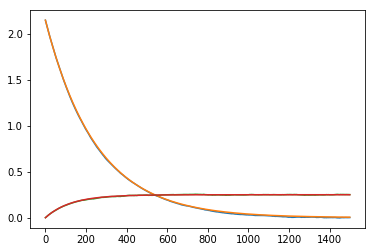

In [131]:
ts = np.arange(0, total_steps, 1)
s = S[0]
plt.plot(ts, mean_xs)
plt.plot(ts, mean(ts, dt, x0, D, s))
plt.plot(ts, var_xs)
plt.plot(ts, var(ts, dt, D, s))